In [1]:
# Import package for getting dataset example
import wooldridge as woo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import math

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Simple OLS Regression

We are concerned with estimating the population parameters $ \beta_0 $ and $ \beta_1 $ of the simple linear regression model:

$$
y = \beta_0 + \beta_1 x
$$

from a random sample of $ y $ and $ x $. According to Wooldridge (2019, Section 2.2), the ordinary least squares (OLS) estimators are:

$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
$$

$$
\hat{\beta}_1 = \frac{\text{Cov}(x, y)}{\text{Var}(x)}
$$

Where:
- $ \bar{x} $ = Average of independent x 
- $ \bar{y} $ = Average of dependent y
- $ \hat{\beta}_0 $ and $ \hat{\beta}_1 $ = Sample parameters model

Assumptions OLS Simple Linear Regression:
- The population model follows simple linear regression formula.
- The error (or residu) has an expected value of zero.
- Homoscedasticity => the variance of error (or residu) is constant.

Three important properties of OLS:
1. The sum of residuals is zero.
2. The sum of residuals dot regressors is zero (implies that covariance between residuals and regressors is zero).
3. The point of ($\bar{x}$, $\bar{y}$) is always on OLS regression line.

![images](images/Example_2-3.png)

In [2]:
# Extract data
ceosal1 = woo.dataWoo('ceosal1')
x = ceosal1['roe']
y = ceosal1['salary']

# Ingredients to OLS formulas
x_bar = np.mean(x)
y_bar = np.mean(y)
cov_xy = np.cov(x, y)[0, 1]
var_x = np.var(x, ddof=1)

# Estimates parameter
beta_1 = cov_xy / var_x
beta_0 = y_bar - beta_1 * x_bar

print(f"Estimated slope = {round(beta_1, 3)} and intercept = {round(beta_0, 3)}")

Estimated slope = 18.501 and intercept = 963.191


In [3]:
# Alternative using stats.formula.api

reg = smf.ols(formula='salary ~ roe', data=ceosal1)
results = reg.fit()
params = results.params

print("Parameters:")
print(params)

Parameters:
Intercept    963.191336
roe           18.501186
dtype: float64


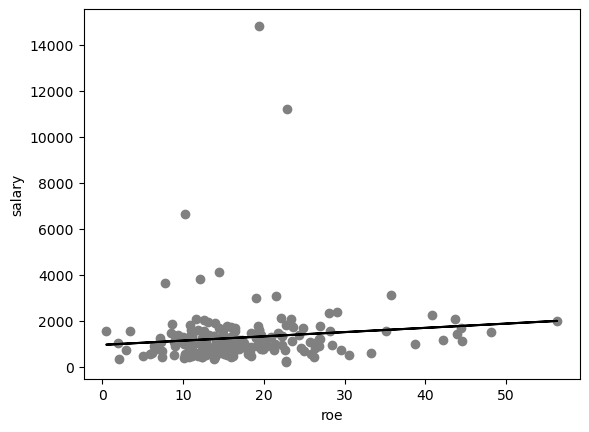

In [4]:
# Scatter plot
y_fit = results.fittedvalues

plt.plot('roe', 'salary', data=ceosal1, color='grey', marker='o', linestyle='')
plt.plot(ceosal1['roe'], y_fit, color='black', linestyle='-')
plt.ylabel('salary')
plt.xlabel('roe')
plt.show()

![images](images/Example_2-4.png)

Parameters:
Intercept   -0.904852
educ         0.541359
dtype: float64


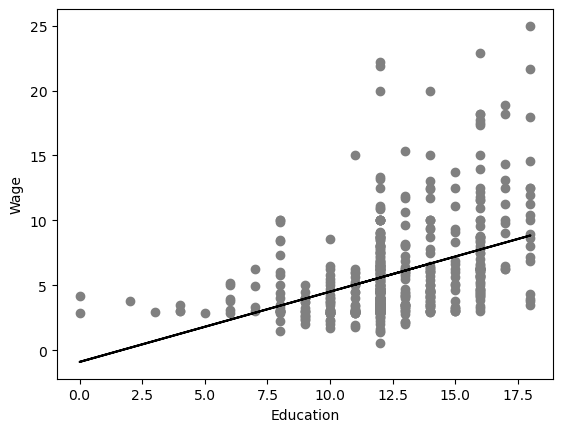

In [5]:
# Extract data
wage1 = woo.dataWoo('wage1')
# x = wage1['educ']
# y = wage1['wage']

# Modeling
reg = smf.ols(formula='wage ~ educ', data=wage1)
model = reg.fit()

# Get params
params = model.params
print("Parameters:")
print(params)

# Plot scatter
y_fitted = model.fittedvalues
plt.plot('educ', 'wage', data=wage1, color='grey', marker='o', linestyle='')
plt.plot(wage1['educ'], y_fitted, color='black', linestyle='-')
plt.ylabel('Wage')
plt.xlabel('Education')
plt.show()

![images](images/Example_2-5.png)

Parameters:
Intercept    26.812214
shareA        0.463827
dtype: float64


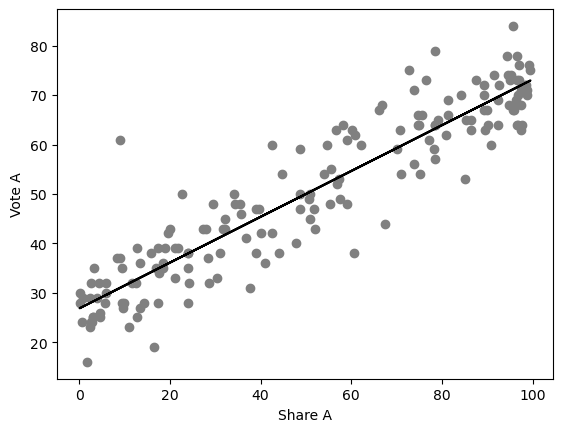

In [6]:
# Extract data
vote1 = woo.dataWoo('vote1')

# Modeling
model = smf.ols(formula='voteA ~ shareA', data=vote1).fit()

# Get params
params = model.params
print("Parameters:")
print(params)

# Plot scatter
y_fitted = model.fittedvalues
plt.plot('shareA', 'voteA', data=vote1, color='grey', marker='o', linestyle='')
plt.plot(vote1['shareA'], y_fitted, color='black', linestyle='-')
plt.ylabel('Vote A')
plt.xlabel('Share A')
plt.show()

# Coefficients, Fitted Values, and Residuals

Residuals $ \hat{e}_i $ is defined as :
$$
\hat{e}_i = \text{y}_i - \hat{\text{y}}_i
$$

Where:
- $ \text{y}_i $ = Actual y
- $ \hat{\text{y}}_i $ = Fitted y

![images](images/Example_2-6.png)

In [7]:
# Extract data
ceosal1 = woo.dataWoo('ceosal1')

# Modeling
model = smf.ols(formula='salary ~ roe', data=ceosal1).fit()
params = model.params

# Get fitted value and residuals
y_hat = model.fittedvalues
residual = model.resid

# Print table
table = pd.DataFrame({'roe': ceosal1['roe'],
                      'salary': ceosal1['salary'],
                      'salary_fitted': y_hat,
                      'residual': residual})
print(table)

      roe  salary  salary_fitted    residual
0    14.1    1095    1224.058071 -129.058071
1    10.9    1001    1164.854261 -163.854261
2    23.5    1122    1397.969216 -275.969216
3     5.9     578    1072.348338 -494.348338
4    13.8    1368    1218.507712  149.492288
..    ...     ...            ...         ...
204   9.0     930    1129.702014 -199.702014
205  15.5     525    1249.959725 -724.959725
206  12.1     658    1187.055698 -529.055698
207  13.7     555    1216.657586 -661.657586
208  14.4     626    1229.608413 -603.608413

[209 rows x 4 columns]


![images](images/Example_2-7.png)

In [8]:
# Extract data
wage1 = woo.dataWoo('wage1')

# Modeling
model = smf.ols(formula='wage ~ educ', data=wage1).fit()

# Properties 1
residuals = model.resid
print("Properties 1: Sum of residuals must be zero")
print(f"Sum of residuals = {np.sum(residuals)}")

# Properties 2
print("\nProperties 2: Covariance residuals and regressor must be zero")
cov_ex = np.cov(residuals, wage1['educ'])[0, 1]
print(f"Covariance residuals and regressor = {cov_ex}")

# Properties 3
print('\nProperties 3: The average of x and y exist in OLS regression line')
x_avg = np.mean(wage1['educ'])
y_avg = np.mean(wage1['wage'])
y_avg_ols = model.params.iloc[1] * x_avg + model.params.iloc[0]
print(f"The y in OLS regression = {y_avg_ols}")
print(f"The y average = {y_avg}")

Properties 1: Sum of residuals must be zero
Sum of residuals = -4.291678123991005e-12

Properties 2: Covariance residuals and regressor must be zero
Covariance residuals and regressor = 1.258675703346463e-15

Properties 3: The average of x and y exist in OLS regression line
The y in OLS regression = 5.896102674787044
The y average = 5.896102674787035


# Goodness of Fit

Explains how well the regression model explains observed data. The formula:

$$
\text{R}^2 = \frac{\text{Var}(\hat{y})}{\text{Var}(y)} = 1 - \frac{\text{Var}(\hat{e})}{\text{Var}(y)} 
$$


![images](images/Example_2-8.png)

In [9]:
# Extract data
ceosal1 = woo.dataWoo('ceosal1')

# Modeling
model = smf.ols(formula='salary ~ roe', data=ceosal1).fit()

# Get fitted value and residu
y_hat = model.fittedvalues
residu = model.resid

# (1) Using formula var(y_hat)/var(y)
r2_1 = np.var(y_hat, ddof=1) / np.var(ceosal1['salary'], ddof=1)
print(f"Approximation 1: {r2_1}")
# (2) Using formula 1 - var(residu)/var(y)
r2_2 = 1 - (np.var(residu, ddof=1) / np.var(ceosal1['salary'], ddof=1))
print(f"Approximation 2: {r2_2}")
# (3) Using correlation coefficient formula
r2_3 = np.corrcoef(ceosal1['salary'], y_hat)[1, 0] ** 2
print(f"Approximation 3: {r2_3}")

Approximation 1: 0.013188624081034115
Approximation 2: 0.01318862408103405
Approximation 3: 0.013188624081034096


![images](images/Example_2-9.png)

In [10]:
# Extract data
vote1 = woo.dataWoo('vote1')

# Modeling
model = smf.ols(formula='voteA ~ shareA', data=vote1).fit()

# Get table result
table = pd.DataFrame({
    'Parameters': round(model.params, 4),
    'Squared error': round(model.bse, 4),
    't-value': round(model.tvalues, 4),
    'p value': round(model.pvalues, 4)
})

# Print table
print("Table:")
print(table)

# print summary
summary = model.summary()
print("\nSummary:")
print(summary)

Table:
           Parameters  Squared error  t-value  p value
Intercept     26.8122         0.8872  30.2207      0.0
shareA         0.4638         0.0145  31.9008      0.0

Summary:
                            OLS Regression Results                            
Dep. Variable:                  voteA   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1018.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           6.63e-74
Time:                        15:48:54   Log-Likelihood:                -565.20
No. Observations:                 173   AIC:                             1134.
Df Residuals:                     171   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std

**Explanation:**
- The r-squared result is 85.6% of the variability in the dependent variable (voteA) can be explained by the independent variable (shareA). This is strong r-squared value.
- Since t-value more than abs(2), indicates that the parameter prediction under statistical significant area which is the 5% area. It can be seen from the result of p-value which gives result ~ 0.
- The std error gives small result means that the coefficient is precise enough.
- The F-statistic is very large, and the corresponding p-value is extremely small, indicating that the model as a whole is statistically significant.
- The Durbin-Watson statistic is close to 2, suggesting that there is no significant autocorrelation in the residuals.
- The Omnibus and Jarque-Bera tests suggest that the residuals might not be perfectly normally distributed (as indicated by the p-values close to 0). However, this may not necessarily invalidate the model but could be a point of consideration depending on the application.

NOTES:
- In regression, a “good” t-statistic or t-value is one that is significantly higher in absolute value than the critical value from the t-distribution for a chosen significance level, typically around 2 or -2 for a 95% confidence level. This indicates that the coefficient is likely statistically significant.

# Nonlinearities

In case nonlinearities, sometimes it can be solved by transform the variable into another form. For example logarithmic, quadratic, and so on.

![images](images/Example_2-10.png)

In [11]:
# Extract data
wage1 = woo.dataWoo('wage1')

# Model without transformation
model = smf.ols(formula='wage ~ educ', data=wage1).fit()
y_hat = model.fittedvalues
r2 = np.var(y_hat, ddof=1) / np.var(wage1['wage'], ddof=1)
print(f"R-square without transformation: {round(r2, 4)}")

# Model with transformation
model_transform = smf.ols(formula='np.log(wage) ~ educ', data=wage1).fit()
y_hat_transform = model_transform.fittedvalues
r2_transform = np.var(y_hat_transform, ddof=1) / np.var(np.log(wage1['wage']), ddof=1)
print(f"R-square with transformation: {round(r2_transform, 4)}")

# Print parameters from model transformation
print("\nParamters :")
print(model_transform.params)

R-square without transformation: 0.1648
R-square with transformation: 0.1858

Paramters :
Intercept    0.583773
educ         0.082744
dtype: float64


![images](images/Example_2-11.png)

In [12]:
# Extract data
ceosal1 = woo.dataWoo('ceosal1')

# Model without transformation
model = smf.ols(formula='salary ~ sales', data=ceosal1).fit()
y_hat = model.fittedvalues
r2 = np.var(y_hat, ddof=1) / np.var(ceosal1['salary'], ddof=1)
print(f"R-square without transformation: {round(r2, 4)}")

# Model with transformation
model_transform = smf.ols(formula='np.log(salary) ~ np.log(sales)', data=ceosal1).fit()
y_hat_transform = model_transform.fittedvalues
r2_transform = np.var(y_hat_transform, ddof=1) / np.var(np.log(ceosal1['salary']), ddof=1)
print(f"R-square with transformation: {round(r2_transform, 4)}")

# Print parameters from model transformation
print("\nParamters :")
print(model_transform.params)

R-square without transformation: 0.0144
R-square with transformation: 0.2108

Paramters :
Intercept        4.821996
np.log(sales)    0.256672
dtype: float64


# Regression through the Origin and Regression on a Constant

- In case regression without intercept (through origin): Write it implicitly.
> smf.ols(formula='y ~ 0 + x', data=sample)

- In case without slope
> smf.ols(formula='y ~ 1', data=sample)


In [13]:
# Example
ceosal1 = woo.dataWoo('ceosal1')

# (1) Modeling usual OLS regression
model_1 = smf.ols(formula='salary ~ roe', data=ceosal1).fit()
print("Model 1 parameters:")
print(model_1.params)

# (2) Modeling without intercept
model_2 = smf.ols(formula='salary ~ 0 + roe', data=ceosal1).fit()
print("\nModel 2 parameters:")
print(model_2.params)

# (3) Modeling without slope
model_3 = smf.ols(formula='salary ~ 1', data=ceosal1).fit()
print("\nModel 3 parameters:")
print(model_3.params)

print(f"\nAverage y: {np.mean(ceosal1['salary'])}")
print(f"Average x: {np.mean(ceosal1['roe'])}")

Model 1 parameters:
Intercept    963.191336
roe           18.501186
dtype: float64

Model 2 parameters:
roe    63.537955
dtype: float64

Model 3 parameters:
Intercept    1281.119617
dtype: float64

Average y: 1281.1196172248804
Average x: 17.18421050521175


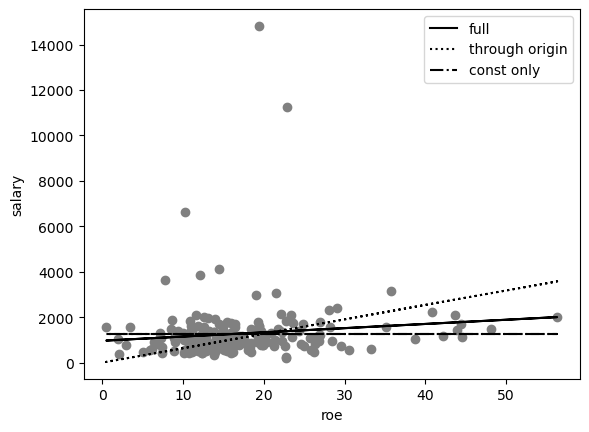

In [14]:
# Plotting
plt.plot('roe', 'salary', data=ceosal1, color='grey',
         marker='o', linestyle='', label='')
plt.plot(ceosal1['roe'], model_1.fittedvalues, color='black',
         linestyle='-', label='full')
plt.plot(ceosal1['roe'], model_2.fittedvalues, color='black',
         linestyle=':', label='through origin')
plt.plot(ceosal1['roe'], model_3.fittedvalues, color='black',
         linestyle='-.', label='const only')
plt.ylabel("salary")
plt.xlabel("roe")
plt.legend()
plt.show()

# Expected Values, Variances, and Standard Errors

- Error variance => The larger its value, the distribution of the unobservables affecting y is more spread out. The formula:

$$
\hat{\sigma}^2 = \frac{1}{n - 2} \cdot \sum_{i=1}^{n} \hat{e}_i^2 = \frac{n - 1}{n - 2} \cdot \text{Var}(\hat{e}_i)
$$

NOTE: Its square root is called Standard Error of the Regression (SER).

- Standard errors of estimators:

$$
\text{se}(\hat{\beta}_0) = \sqrt{\frac{\hat{\sigma}^2 \cdot \bar{x}^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}} = \frac{1}{\sqrt{n - 1}} \cdot \frac{\hat{\sigma}}{\text{sd}(x)} \cdot \sqrt{\bar{x^2}}
$$

$$
\text{se}(\hat{\beta}_1) = \sqrt{\frac{\hat{\sigma}^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}} = \frac{1}{\sqrt{n - 1}} \cdot \frac{\hat{\sigma}}{\text{sd}(x)}
$$

where :
- $\text{sd}(x)$ = is the sample standard deviation = $\sqrt{\frac{1}{n-1} \cdot \sum_{i=1}^{n} (x_i - \bar{x})^2}$.
- $ \bar{x^2} $ = Average squared of regressor x


![images](images/Example_2-12.png)

In [15]:
# Extract data
meap93 = woo.dataWoo('meap93')

# Modeling
model = smf.ols(formula='math10 ~ lnchprg', data=meap93).fit()

# Calculate Standard Error Regression (SER)
n = model.nobs
var_resid = np.var(model.resid, ddof=1)
ser = np.sqrt((n - 1) / (n - 2) * var_resid)
print(f"Standard Error Regression: {ser}")

# Calculate Standard Error b0 & b1
std_x = np.std(meap93['lnchprg'], ddof=1)
x_sqr_avg = np.mean(meap93['lnchprg'] ** 2)
se_b0 = (1 / np.sqrt(n - 1)) * (ser / std_x) * np.sqrt(x_sqr_avg)
se_b1 = (1 / np.sqrt(n - 1)) * (ser / std_x)

print(f"Standard Error b0: {se_b0}")
print(f"Standard Error b1: {se_b1}")
print(model.summary())

Standard Error Regression: 9.56593845948276
Standard Error b0: 0.9975823856755021
Standard Error b1: 0.03483933425836963
                            OLS Regression Results                            
Dep. Variable:                 math10   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     83.77
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           2.75e-18
Time:                        15:48:54   Log-Likelihood:                -1499.3
No. Observations:                 408   AIC:                             3003.
Df Residuals:                     406   BIC:                             3011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

# Monte Carlo Simulations

## A. One Sample

std error regression 2.002
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     46.91
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           1.30e-11
Time:                        18:01:17   Log-Likelihood:                -2112.7
No. Observations:                1000   AIC:                             4229.
Df Residuals:                     998   BIC:                             4239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1902    

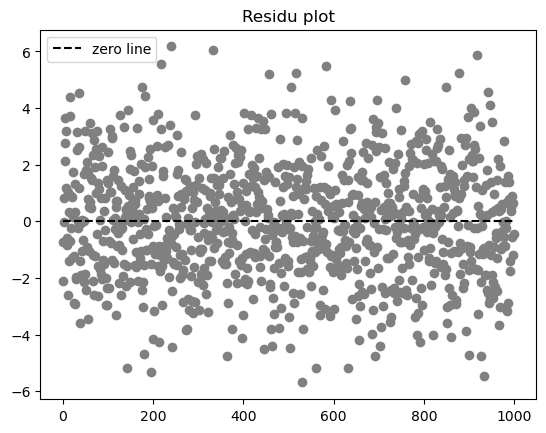

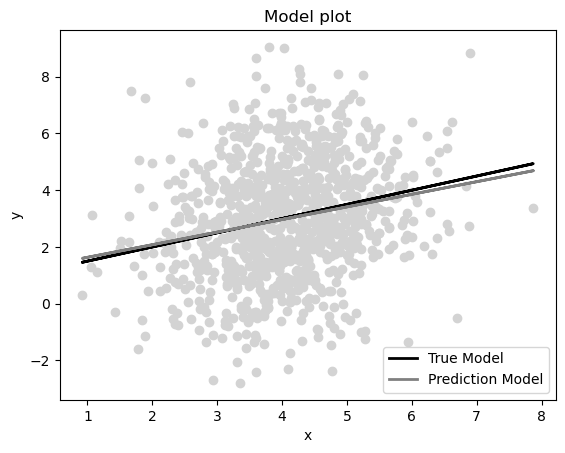

In [49]:
# Set the seed
np.random.seed(1234567)

# Set sample size
n = 1000

# Set true parameters (beta and std of residu)
beta0 = 1
beta1 = 0.5
std_residu = 2 # Assumption model the std residu must be constant (homoscedasticity).

# Generate sample dataset
x = stats.norm.rvs(4, 1, size=n)
residu = stats.norm.rvs(0, std_residu, size=n) # Assumption model the expected value of residu must zero.
y = beta0 + beta1 * x + residu # Generate true y (actual values); Assumption model follow simple linear model.

df = pd.DataFrame({'y': y, 'x': x})


# Estimate parameters by OLS
model = smf.ols(formula='y ~ x', data=df).fit()
y_est = model.fittedvalues
residu = model.resid
std_err_reg = np.sqrt((n - 1) / (n - 2) * np.var(residu))
print(f'std error regression {round(std_err_reg, 3)}')
b0 = model.params.iloc[0]
b1 = model.params.iloc[1]
print(model.summary())

# Plot distribution model residu
plt.title("Residu plot")
plt.plot(range(0, int(n)), residu, color='grey',
         linestyle='', marker='o',)
plt.plot(range(0, int(n)), np.zeros(int(n)),
         linestyle='--', color='black',
         label='zero line')
plt.legend()
plt.show()

# Plot result and model
# x_range = np.linspace(0, 8, num=100)
plt.title("Model plot")
plt.plot(df['x'], df['y'], color='lightgrey',
         linestyle='', marker='o')
plt.plot(df['x'], beta0 + beta1 * df['x'],
         color='black', linestyle='-',
         linewidth=2, label='True Model')
plt.plot(df['x'], b0 + b1 * df['x'],
         color='grey', linestyle='-',
         linewidth=2, label='Prediction Model')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Multiple Sampling

beta_0 mean: 1.1101567172886369
beta_1 mean: 0.4700874594144998
b0_var: 0.04684701323330643
b1_var: 0.0032442015528885387


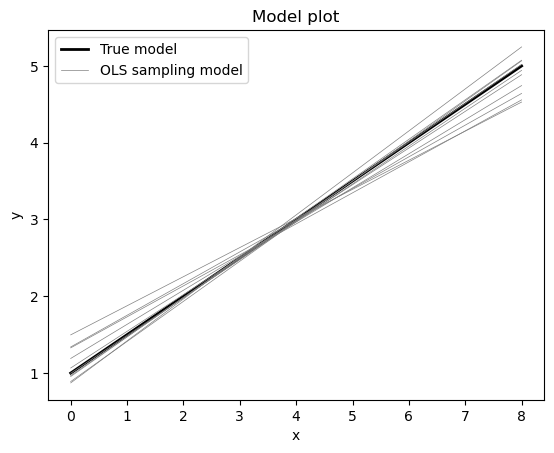

In [54]:
# Set the seed
np.random.seed(1234567)

# Set sample size and number of simulations:
n = 1000
r = 10

# Set true parameters (beta and std of residu)
beta0 = 1
beta1 = 0.5
std_residu = 2 # Assumption model the std residu must be constant (homoscedasticity).

# Initialize b0 and b1 to store results later
b0 = np.empty(r)
b1 = np.empty(r)

# Generate sample dataset
for i in range(r):
    x = stats.norm.rvs(4, 1, size=n)
    residu = stats.norm.rvs(0, std_residu, size=n) # Assumption model the expected value of residu must zero.
    y = beta0 + beta1 * x + residu # Generate true y (actual values); Assumption model follow simple linear model.
    df = pd.DataFrame({'y': y, 'x': x})

    # Estimate parameters by OLS
    model = smf.ols(formula='y ~ x', data=df).fit()
    b0[i] = model.params.iloc[0]
    b1[i] = model.params.iloc[1]

b0_mean = np.mean(b0)
b1_mean = np.mean(b1)
b0_var = np.var(b0, ddof=1)
b1_var = np.var(b1, ddof=1)

print(f"beta_0 mean: {b0_mean}")
print(f"beta_1 mean: {b1_mean}")
print(f'b0_var: {b0_var}')
print(f'b1_var: {b1_var}')

# Plot result and model
x_range = np.linspace(0, 8, num=100)
plt.title("Model plot")
plt.plot(x_range, beta0 + beta1 * x_range,
         color='black', linestyle='-',
         linewidth=2, label='True Model')
# Plot regression lines no. 1 to 10
for i in range(0, 10):
    plt.plot(x_range, b0[i] + b1[i] * x_range, color='grey',
             linestyle='-', linewidth=0.5)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(labels=('True model', 'OLS sampling model'))
plt.show()

## C. Violation Expected Value Residu is Not Zero

beta_0 mean: 0.31015671728863675
beta_1 mean: 0.6700874594145
b0_var: 0.04684701323330637
b1_var: 0.003244201552888535


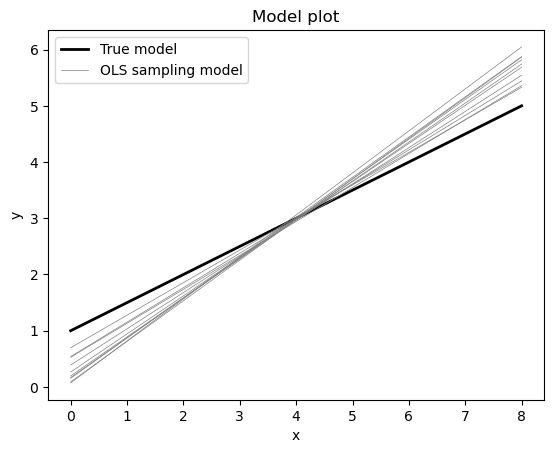

In [55]:
# Set the seed
np.random.seed(1234567)

# Set sample size and number of simulations:
n = 1000
r = 10

# Set true parameters (beta and std of residu)
beta0 = 1
beta1 = 0.5
std_residu = 2 # Assumption model the std residu must be constant (homoscedasticity).

# Initialize b0 and b1 to store results later
b0 = np.empty(r)
b1 = np.empty(r)

# Generate sample dataset
for i in range(r):
    x = stats.norm.rvs(4, 1, size=n)
    u_mean = np.array((x - 4) / 5)
    residu = stats.norm.rvs(u_mean, std_residu, size=n) 
    # The expected value of residu is not zero
    y = beta0 + beta1 * x + residu # Generate true y (actual values); Assumption model follow simple linear model.
    df = pd.DataFrame({'y': y, 'x': x})

    # Estimate parameters by OLS
    model = smf.ols(formula='y ~ x', data=df).fit()
    b0[i] = model.params.iloc[0]
    b1[i] = model.params.iloc[1]

b0_mean = np.mean(b0)
b1_mean = np.mean(b1)
b0_var = np.var(b0, ddof=1)
b1_var = np.var(b1, ddof=1)

print(f"beta_0 mean: {b0_mean}")
print(f"beta_1 mean: {b1_mean}")
print(f'b0_var: {b0_var}')
print(f'b1_var: {b1_var}')

# Plot result and model
x_range = np.linspace(0, 8, num=100)
plt.title("Model plot")
plt.plot(x_range, beta0 + beta1 * x_range,
         color='black', linestyle='-',
         linewidth=2, label='True Model')
# Plot regression lines no. 1 to 10
for i in range(0, 10):
    plt.plot(x_range, b0[i] + b1[i] * x_range, color='grey',
             linestyle='-', linewidth=0.5)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(labels=('True model', 'OLS sampling model'))
plt.show()

NOTES:
- The result gives bias parameters estimation.

## D. Heteroscedasticity

beta_0 mean: 1.1609033758357992
beta_1 mean: 0.4541548509127991
b0_var: 0.08661937606549677
b1_var: 0.006820127336741292


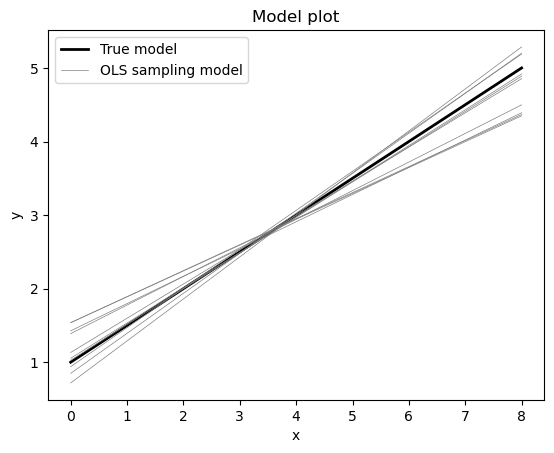

In [57]:
# Set the seed
np.random.seed(1234567)

# Set sample size and number of simulations:
n = 1000
r = 10

# Set true parameters (beta and std of residu)
beta0 = 1
beta1 = 0.5

# Initialize b0 and b1 to store results later
b0 = np.empty(r)
b1 = np.empty(r)

# Generate sample dataset
for i in range(r):
    x = stats.norm.rvs(4, 1, size=n)
    u_var = np.array(4 / np.exp(4.5) * np.exp(x))
    residu = stats.norm.rvs(0, np.sqrt(u_var), size=n) 
    # The residu is heteroscedasticity
    y = beta0 + beta1 * x + residu # Generate true y (actual values); Assumption model follow simple linear model.
    df = pd.DataFrame({'y': y, 'x': x})

    # Estimate parameters by OLS
    model = smf.ols(formula='y ~ x', data=df).fit()
    b0[i] = model.params.iloc[0]
    b1[i] = model.params.iloc[1]

b0_mean = np.mean(b0)
b1_mean = np.mean(b1)
b0_var = np.var(b0, ddof=1)
b1_var = np.var(b1, ddof=1)

print(f"beta_0 mean: {b0_mean}")
print(f"beta_1 mean: {b1_mean}")
print(f'b0_var: {b0_var}')
print(f'b1_var: {b1_var}')

# Plot result and model
x_range = np.linspace(0, 8, num=100)
plt.title("Model plot")
plt.plot(x_range, beta0 + beta1 * x_range,
         color='black', linestyle='-',
         linewidth=2, label='True Model')
# Plot regression lines no. 1 to 10
for i in range(0, 10):
    plt.plot(x_range, b0[i] + b1[i] * x_range, color='grey',
             linestyle='-', linewidth=0.5)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(labels=('True model', 'OLS sampling model'))
plt.show()

NOTES:
- The output do not affect significantly on the parameters b0 and b1. However the assumption and the formula for estimating standard error of the regression and standard errors of parameters gives less accurate result.